In [11]:
from matplotlib import pyplot as plt
import numpy as np

import pickle

from lib.enumeration_qvmc.hamiltonian import Hamiltonian
from lib.enumeration_qvmc.state import State
from lib.enumeration_qvmc.optimizer import Optimizer
from lib.enumeration_qvmc.debug import Plotter
from lib.enumeration_qvmc.utils import get_initial_w

import random

from configs import cfg

from pdb import set_trace

In [3]:
# HYPER PARAMETERS
DELTA = 1
W1_STEP_SZ = 0.2
W2_STEP_SZ = 0.2
TOTAL_STEPS = 10

start = int(TOTAL_STEPS/2)*-1
stop =  int(TOTAL_STEPS/2)

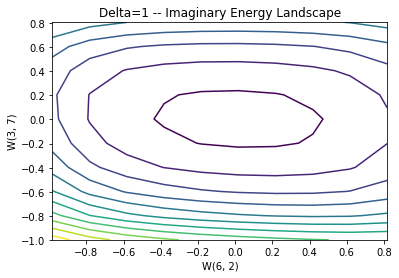

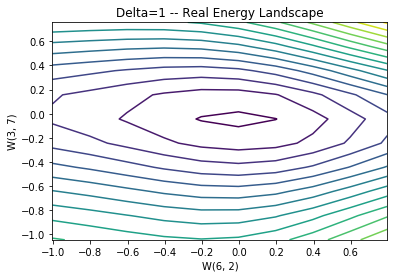

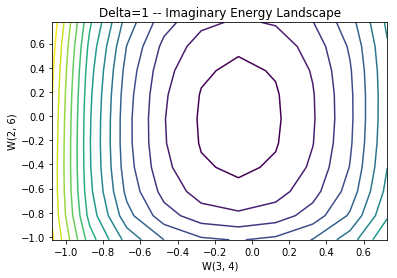

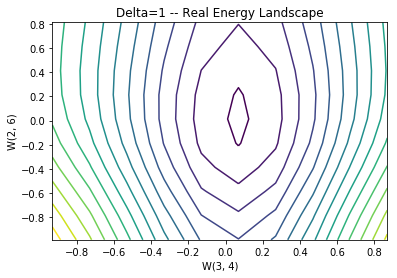

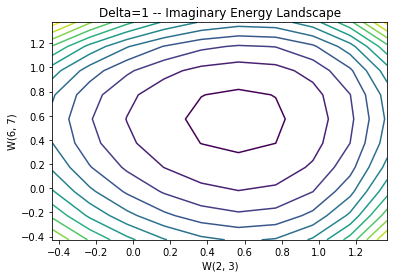

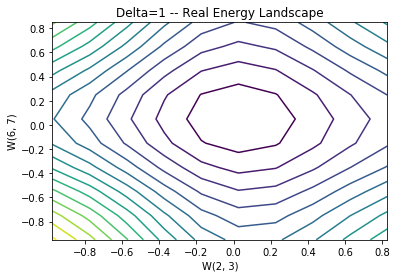

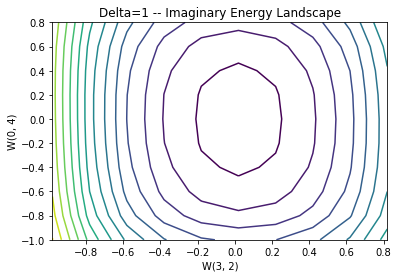

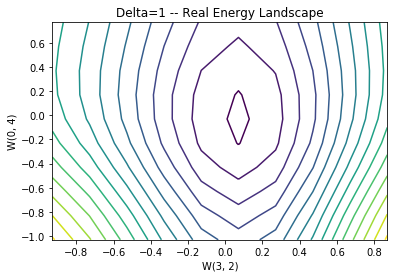

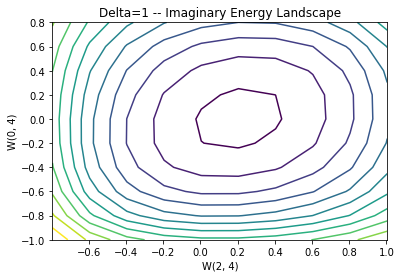

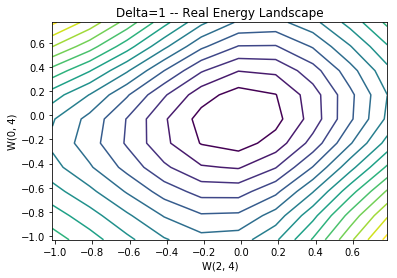

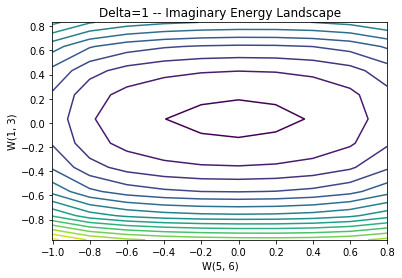

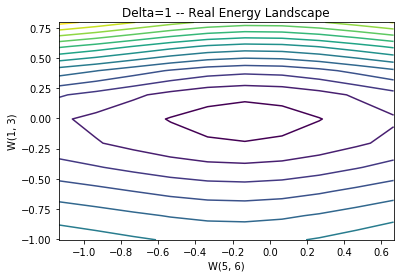

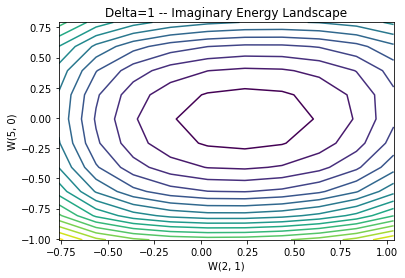

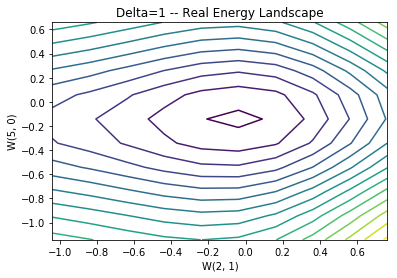

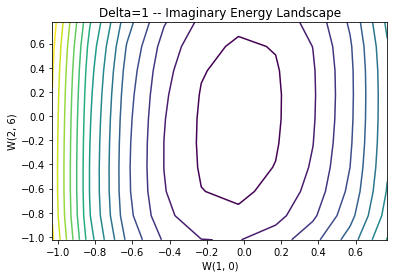

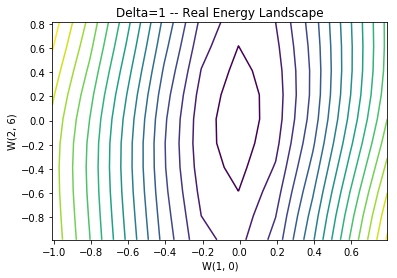

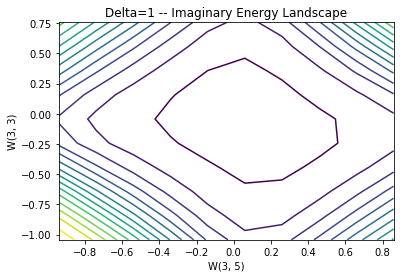

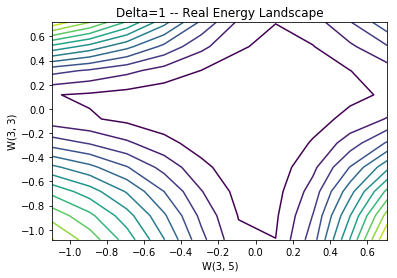

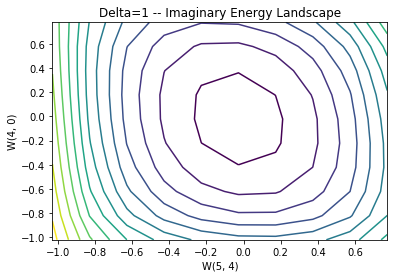

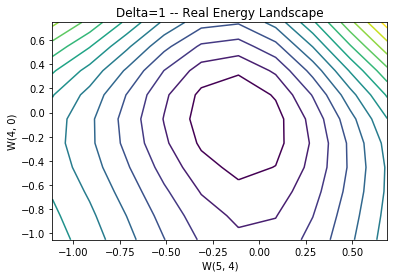

In [29]:
with open('FinalParms8Spins.pickle', 'rb') as file:
    parameters = pickle.load(file)
    
param_copy = dict()
for idx, param in parameters.items():
    param_copy[idx] = param.copy()

cfg['fixed_params'] =  {"a" : parameters['a'],
                         "b" : parameters['b']}

for k in range(10):
    for idx, param in param_copy.items():
        parameters[idx] = param.copy()
    X1 = (random.randint(0,7), random.randint(0,7))
    X2 = (random.randint(0,7), random.randint(0,7))

    W1s_imag = [(parameters['w'][X1[0], X1[1]].imag + i*W1_STEP_SZ)*1j for i in range(start,stop)]
    W1s_real = [parameters['w'][X1[0], X1[1]].real + i*W1_STEP_SZ for i in range(start, stop)]

    W2s_imaj = [(parameters['w'][X2[0], X2[1]].imag + i*W2_STEP_SZ)*1j for i in range(start, stop)]
    W2s_real = [parameters['w'][X2[0], X2[1]].real + i*W2_STEP_SZ for i in range(start,stop)]
    # set_trace()
    # run simulation varying the imaginary parts
    imag_energy_landscape = np.zeros((TOTAL_STEPS, TOTAL_STEPS))
    for i, W1 in enumerate(W1s_imag):
        W1 = parameters['w'][X1[0], X1[1]].real + W1 # add the real part back
        parameters['w'][X1[0], X1[1]] = W1
        for j, W2 in enumerate(W2s_imaj):
            W2 = parameters['w'][X2[0], X2[1]].real + W2 # add the real part back
            parameters['w'][X2[0], X2[1]] = W2

            # RUN SIMULATION
            H = Hamiltonian(cfg['num_particles'], delta=DELTA)
            opt = Optimizer(H, cfg=cfg, plotter=None,
                            parameters = parameters, lr = 0.02, 
                            fixed_parameters = cfg['fixed_params'])

            energy, _, _ = opt.monte_carlo_simulation()
            imag_energy_landscape[i,j] = energy.real
            
    with open('FinalParms8Spins.pickle', 'rb') as file:
        parameters = pickle.load(file)
    # set_trace()
    # run simulation varying the imaginary parts
    real_energy_landscape = np.zeros((TOTAL_STEPS, TOTAL_STEPS))
    for i, W1 in enumerate(W1s_real):
        W1 = parameters['w'][X1[0], X1[1]].imag*1j + W1 # add the imaginary part back
        parameters['w'][X1[0], X1[1]] = W1
        for j, W2 in enumerate(W2s_real):
            W2 = parameters['w'][X2[0], X2[1]].imag*1j + W2 # add the imaginary part back
            parameters['w'][X2[0], X2[1]] = W2

            # RUN SIMULATION
            H = Hamiltonian(cfg['num_particles'], delta=DELTA)
            opt = Optimizer(H, cfg=cfg, plotter=None,
                            parameters = parameters, lr = 0.02, 
                            fixed_parameters = cfg['fixed_params'])

            energy, _, _ = opt.monte_carlo_simulation()
            real_energy_landscape[i,j] = energy.real
            
    # PLOT COUNTOUR PLOT FOR IMAGINARY
    W1s = [w1.imag for w1 in W1s_imag]
    W2s = [w2.imag for w2 in W2s_imaj]
    
    cs = plt.contour(W1s, W2s, imag_energy_landscape, levels = 15, extend='both')
    plt.title(f'Delta={DELTA} -- Imaginary Energy Landscape')
    plt.xlabel(f'W{X1}')
    plt.ylabel(f'W{X2}')
    cs.changed()
    plt.show()

    cs = plt.contour(W1s_real, W2s_real, real_energy_landscape, levels = 15, extend='both')
    plt.title(f'Delta={DELTA} -- Real Energy Landscape')
    plt.xlabel(f'W{X1}')
    plt.ylabel(f'W{X2}')
    cs.changed()
    plt.show()